## 2.Decision Tree

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd  

In [3]:
df = pd.read_csv('car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
# input data
x = df.iloc[:,2:4]
x

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


In [6]:
# output data
y = df.iloc[:,4:5]
y

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [7]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=12)

In [11]:
#feature Scaling, we need this because our input data gap is more (Age, AnnualSalary)
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [13]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=12)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=12)

In [14]:
#Predicting the test set result
y_pred = dtc.predict(x_test)

In [15]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [16]:
#Creating the Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   7],
       [ 14,  77]], dtype=int64)

#### The total true value is 102 + 77 = 179, which means that 89.5% of the predictions are true. On the other hand, the total false value is 14 + 7 = 21, which means that 10.5% of the predictions are false.

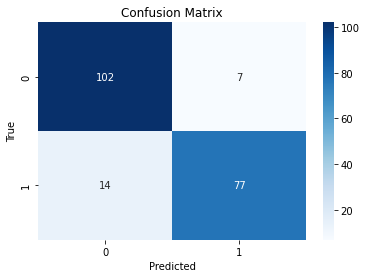

In [19]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.895